## <div class="alert alert-block alert-info"><b>Project:</b> Classification of Concrete Chloride Resistance</div>

# About the project


**Background:** Chloride attack is one of the most serious threats to the durability of reinforced concrete (RC) structures exposed to coastal environments and chloride-containing deicing salts. The chloride resistance of concrete to chloride ion penetration can be divided into five levels based on the values of the non-steady-state migration coefficients $(D_{nssm})$, as shown in the table below. 

|Chloride Migration coefficient $D_{nssm}$ (x$10^{-12} m^2/s$)|Resistance to Chloride Penetration
|-|-
|>15  |Low
|10–15|Moderate
|5–10|High
|2.5–5|Very high
|<2.5|Exemely high

**Problem statement:** Chloride ion diffusivity is one of the most important indicators of durability of RC structures exposed to chloride-laden environments. Concrete chloride diffusion coefficient is typically determined in a laboratory using various test procedures such as ASTM C1556–11, NT Build 443, and NT Build 492. Unlike the other tests, the Nordic standard NT Build 492 test is completed in a relatively short period of time, making it a widely accepted test method. To distinguish the NT Build 492 test method from other tests, the diffusion coefficient obtained using this method is referred to as the non-steady-state migration coefficient or $(D_{nssm})$. Despite the fact that the NT Build 492 test method provides quick results, it is typically performed by an experienced operator 28 days after concrete preparation in the lab, making the whole process a resource- and time-consuming task. Hence, determining the concrete's resistance level to chloride penetration in a timely and resource-efficient manner is critical for the durability of RC structures exposed to the coastal environment and deicing salt. 

**Objective:** The objectives are twofold: i) devising a machine learning based approach for predicting the degree of resistance of concrete to chloride penetration for the durability design and service-life assessment of chloride-exposed reinforced concrete buildings, and ii) investigating the importance of concrete mix components in predicting the resistance of concrete to chloride penetration and contributing to a better understanding of the durability and service life of reinforced concrete buildings in coastal region or subjected to chloride-loaded environments.

**Data:** A comprehensive dataset of mix ingredients of different concrete types with their chloride resistance level is used to train and validate the models.


# Data

The database comprises information on the concrete mix proportions of various concrete types. The concrete mix has eight features that describe the type and proportion of its components. These are w/b ratio, contents of binders (cement, slag, FA, SF, and lime filler) in units of $kg/m^3$, amount of fine, coarse, and total aggregates in units of $kg/m^3$, contents of chemical additives (plasticizers, superplasticizers, and air-entraining agents (AEA) in$\%$ $by$ $binder$ $weight$ $of$ $the$ $binder$. The database also includes the age of the concrete in which the migration tests were performed and the degree of resistance of the concrete to chloride penetration. The following table describes the data in greater detail. 

|No.|Feature subcategory |Description |Unit
|-|-|-|-
|1| Cement types |-|[-]
|2|Water content | - | [kg/m3] 
|3|Cement content  | - | [kg/m3] 
|4|Mineral admixtures content  | Slag | [kg/m3] 
|5| | Fly ash  | [kg/m3] 
|6| | Silica fume | [kg/m3] 
|7| | Lime filler  | [kg/m3] 
|8|Water-to-binder ratio | - | [-]
|9|Aggregates content | Fine aggregate  | [kg/m3] 
|10| | Coarse aggregate  | [kg/m3] 
|11| | Total aggregate | [kg/m3] 
|12|Chemical admixtures content  | Plasticizer | [% by binder wt.]
|13| |Superplasticizer  | [% by binder wt.]
|14| | Air-entraining agent  | [% by binder wt.]
|15|Concrete age at migration test| - | [days]
|16|Concrete’s resistance to chloride penetration | - | [-]

# Method

In this project, **K-Nearest Neighbors**, **Naive Bayes**, **Support Vector Machine**, **Decision Trees**, and **Random Forests** machine learning algorithms are used to build a model that classifies chloride resistance of concrete to chloride ion penetration. These algorithms had never been used before to solve the same problem. 

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import mglearn
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from pandas import concat
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from datetime import datetime

## Retrive the data

In [2]:
# Import the data
df = pd.read_excel('RawData.xlsx')
df.head(3)

,w/b,Water,Cement type,Cement,Slag,Fly ash,Silica fume,Lime filler,Fine aggregate,Coarse aggregate,...,Comp. str. test age,Compressive strength,Air content,Spreed,Slump,Fresh density,Dry density,Migration test age,Dnssm,Migration resistance
0,0.45,180.0,NaN,400.0,0.0,0.0,0.0,0.0,640.0,960.0,...,126.0,63.22,NaN,NaN,NaN,NaN,NaN,120,2.85,Very high
1,0.45,180.0,NaN,380.0,0.0,0.0,20.0,0.0,640.0,960.0,...,126.0,63.46,NaN,NaN,NaN,NaN,NaN,120,1.75,Extremely high
2,0.45,180.0,NaN,360.0,0.0,0.0,40.0,0.0,640.0,960.0,...,126.0,70.88,NaN,NaN,NaN,NaN,NaN,120,0.90,Extremely high


## Data Exploration 

In [3]:
# check the size of the dataframe 
df.shape

(843, 24)

In [4]:
# Check number of nan
df.isnull().sum().sum() 

4818

# Preprocessing 

In [5]:
# Drop features that represent the fresh and hardened properties of concrete.
df0 = df.drop(df.columns[[14, 15, 16,17,18, 19, 20, 22]], axis=1)

df0.head(3)

,w/b,Water,Cement type,Cement,Slag,Fly ash,Silica fume,Lime filler,Fine aggregate,Coarse aggregate,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Migration test age,Migration resistance
0,0.45,180.0,NaN,400.0,0.0,0.0,0.0,0.0,640.0,960.0,1600.0,0.0,0.0,0.0,120,Very high
1,0.45,180.0,NaN,380.0,0.0,0.0,20.0,0.0,640.0,960.0,1600.0,0.0,0.0,0.0,120,Extremely high
2,0.45,180.0,NaN,360.0,0.0,0.0,40.0,0.0,640.0,960.0,1600.0,0.0,0.0,0.0,120,Extremely high


## Handling of missed data

In [6]:
# Check number of nan
df0.isnull().sum().sum() 

1462

In [7]:
# Drop all rows with NaN values and reset index after drop
df0 = df0.dropna().reset_index(drop=True)
df0.head(3)

,w/b,Water,Cement type,Cement,Slag,Fly ash,Silica fume,Lime filler,Fine aggregate,Coarse aggregate,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Migration test age,Migration resistance
0,0.55,192.5,CEM I,350.0,0.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,0.0,0.0,28,Low
1,0.55,192.5,CEM II/A-D,329.0,0.0,0.0,21.0,0.0,694.766,1059.600,1754.366,0.0,0.0,0.0,28,Moderate
2,0.55,192.5,CEM II/A-V,297.5,0.0,52.5,0.0,0.0,692.233,1056.951,1749.184,0.0,0.0,0.0,28,Low


In [8]:
# Sanity check
df0.isnull().sum().sum() 

0

In [9]:
# check the size of a dataframe "df_all_ing"
df0.shape

(204, 16)

In [10]:
# computes and displays summary statistics for dataframe "df_all_ing"
df0.describe()

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Lime filler,Fine aggregate,Coarse aggregate,Total aggregate,Plasticizer,Superplasticizer,Air entraining,Migration test age
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0,204.000000,204.000000,204.000000,204.0,204.000000,204.0,204.000000
mean,0.424000,175.991176,361.850000,18.438725,44.122059,8.361765,0.0,798.830755,797.205485,1596.036240,0.0,0.414598,0.0,65.568627
std,0.079792,22.640191,96.903092,57.348913,133.697922,35.459964,0.0,223.797309,306.175360,291.545939,0.0,0.541004,0.0,83.702147
min,0.300000,122.500000,52.000000,0.000000,0.000000,0.000000,0.0,235.000000,0.000000,630.000000,0.0,0.000000,0.0,3.000000
25%,0.360000,158.000000,297.875000,0.000000,0.000000,0.000000,0.0,685.258250,451.500000,1415.820000,0.0,0.000000,0.0,28.000000
50%,0.400000,175.000000,350.000000,0.000000,0.000000,0.000000,0.0,765.000000,915.530000,1720.000000,0.0,0.200000,0.0,28.000000
75%,0.450000,191.000000,444.375000,0.000000,0.000000,0.000000,0.0,956.750000,1059.950000,1801.000000,0.0,0.700000,0.0,90.000000
max,0.651786,222.000000,525.000000,312.300000,735.000000,468.500000,0.0,1574.100000,1240.000000,1950.000000,0.0,4.166667,0.0,365.000000


### Data exploration through visualization 

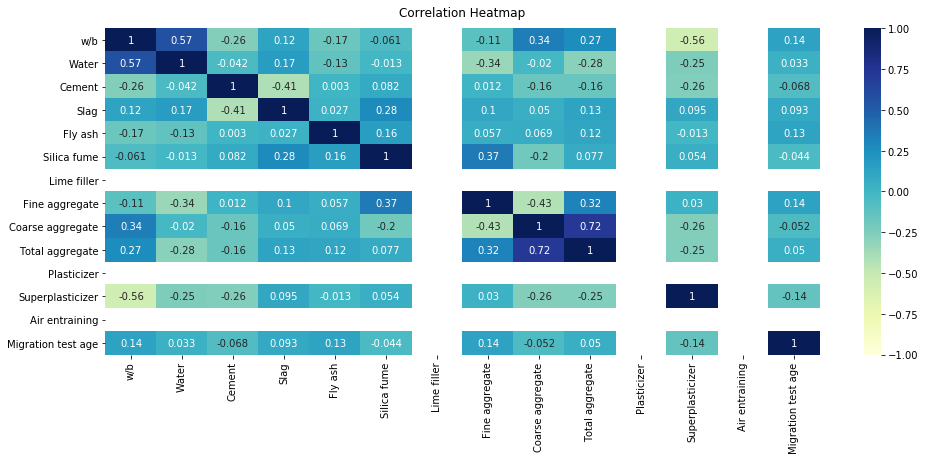

In [11]:
# Plot correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df0.corr(), vmin=-1, cmap="YlGnBu", vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [12]:
# Write the prediction in an Excel sheet to visualize with another tool.
df0.to_excel("df_corr_class.xlsx",sheet_name='Corr') 

It can be noticed from the pair plot and a heat map that features (*Lime filler*, *Plasticizer*, and *Air entraining*) have only zero values after all NaN are removed from the dataframe. Hence, these features are useless for the analysis.

In [13]:
# create a scatter matrix from the dataframe, color by y_train
from pandas.plotting import scatter_matrix
#grr = scatter_matrix(df0.loc[:,['w/b','Cement','Slag','Fly ash','Silica fume','Fine aggregate']], c=y, figsize=(15, 15), marker='o',
   #                     hist_kwds={'bins': 20}, s=20, alpha=.8, cmap=mglearn.cm3)

To develop models that classify chloride resistance of concrete to chloride ion penetration, two scenarios (**Scenarios: 1** and **Scenario: 2**) are considered. The main difference between the two scenarios is the number of input features describing the ingredients of the concrete mix. **Scenario: 1** considers all of the features described in the preceding table, whereas **Scenario: 2** considers only a subset of the features via the implementation feature selection process. 

# <div class="alert alert-block alert-info"><b><font color='red'> Scenario: 1 <font color='red'> </b> </div>

In [14]:
# Remove unnecessary  features 
df2= df0.drop(columns=['Lime filler','Plasticizer','Air entraining'])
df2.head(2)

,w/b,Water,Cement type,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age,Migration resistance
0,0.55,192.5,CEM I,350.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,28,Low
1,0.55,192.5,CEM II/A-D,329.0,0.0,0.0,21.0,694.766,1059.600,1754.366,0.0,28,Moderate


In [15]:
df2.describe()

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.424000,175.991176,361.850000,18.438725,44.122059,8.361765,798.830755,797.205485,1596.036240,0.414598,65.568627
std,0.079792,22.640191,96.903092,57.348913,133.697922,35.459964,223.797309,306.175360,291.545939,0.541004,83.702147
min,0.300000,122.500000,52.000000,0.000000,0.000000,0.000000,235.000000,0.000000,630.000000,0.000000,3.000000
25%,0.360000,158.000000,297.875000,0.000000,0.000000,0.000000,685.258250,451.500000,1415.820000,0.000000,28.000000
50%,0.400000,175.000000,350.000000,0.000000,0.000000,0.000000,765.000000,915.530000,1720.000000,0.200000,28.000000
75%,0.450000,191.000000,444.375000,0.000000,0.000000,0.000000,956.750000,1059.950000,1801.000000,0.700000,90.000000
max,0.651786,222.000000,525.000000,312.300000,735.000000,468.500000,1574.100000,1240.000000,1950.000000,4.166667,365.000000


In [16]:
# count the target class labels before outliers removed 

df2['Migration resistance'].value_counts()

High              97
Low               33
Very high         32
Moderate          26
Extremely high    16
Name: Migration resistance, dtype: int64

Text(0, 0.5, 'Counts')

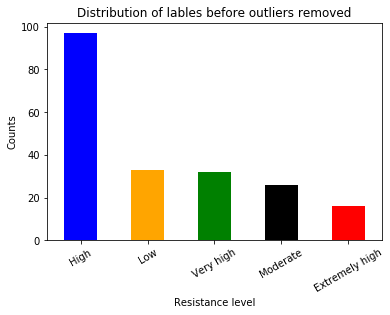

In [17]:
# Visualize the distribution of the lables
color = ['blue','orange', 'green', 'black','red']
df2['Migration resistance'].value_counts().plot(kind='bar', color = color);
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Distribution of lables before outliers removed')
plt.xlabel("Resistance level")
plt.ylabel("Counts")

## Encoding Categorical Data 

In [18]:
# Examine  the data types of all features considered in the dataframe
df2.dtypes

w/b                     float64
Water                   float64
Cement type              object
Cement                  float64
Slag                    float64
Fly ash                 float64
Silica fume             float64
Fine aggregate          float64
Coarse aggregate        float64
Total aggregate         float64
Superplasticizer        float64
Migration test age        int64
Migration resistance     object
dtype: object

It can be noticed that the data types of cement type and Migration resistance read as object. This is because the data of these features are non-numerical. The data type of this feature shall be transformed from non-numerical labels to numerical labels using label encoder.

Now let's convert a "Cement type" and "Migration resistance" column to a category as it is a prerequisite for encoding.

In [19]:
df2 = df2.astype({"Cement type": "category", "Migration resistance": "category"})
# Sanity check
df2.dtypes

w/b                      float64
Water                    float64
Cement type             category
Cement                   float64
Slag                     float64
Fly ash                  float64
Silica fume              float64
Fine aggregate           float64
Coarse aggregate         float64
Total aggregate          float64
Superplasticizer         float64
Migration test age         int64
Migration resistance    category
dtype: object

Let's take a look at the labels for the cement type. 

In [20]:
df2['Cement type'].unique()

[CEM I, CEM II/A-D, CEM II/A-V, CEM II/B-V, CEM III/A, CEM II/B-S, CEM IV/A]
Categories (7, object): [CEM I, CEM II/A-D, CEM II/A-V, CEM II/B-V, CEM III/A, CEM II/B-S, CEM IV/A]

There are only seven different types of cement, which can be divided into four categories (CEM I, CEM II, CEM III, and CEM IV). Although they are divided into four major groups, there are no orders or scales for group numbering. As a result, the cement type categorical data is considered nominal rather than ordinal. When converting categorical data (with nominal data type) to numeric data, one-hot encoding is the best option. It assigns binary numbers to each category (0 or 1). 

Let us now investigate the class labels of the feature Migration resistance. 

In [21]:
df2['Migration resistance'].unique()

[Low, Moderate, High, Very high, Extremely high]
Categories (5, object): [Low, Moderate, High, Very high, Extremely high]

Though label encoding techniques that encode labels with values ranging from 0 to no of class -1 are the best option for converting the labels of the feature "Migration resistance," they could be manually encoded to avoid random labeling.

### One-Hot Encoding for "Cement type"

In [22]:
# Convert the values in the Cem_type_cat column into one-hot encoded vectors

df2=pd.get_dummies(df2, columns=["Cement type"])
df2.head(2)


,w/b,Water,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age,Migration resistance,Cement type_CEM I,Cement type_CEM II/A-D,Cement type_CEM II/A-V,Cement type_CEM II/B-S,Cement type_CEM II/B-V,Cement type_CEM III/A,Cement type_CEM IV/A
0,0.55,192.5,350.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,28,Low,1,0,0,0,0,0,0
1,0.55,192.5,329.0,0.0,0.0,21.0,694.766,1059.600,1754.366,0.0,28,Moderate,0,1,0,0,0,0,0


In [23]:
#Shift column 'Migration resistance' to end position
end_column = df2.pop('Migration resistance')

# Determine the postion
position_all_ing = len(df2.columns)
 
# Insert column using insert(position,column_name,end_column) function

df2.insert(position_all_ing, 'Migration resistance', end_column)
df2.head(3)


,w/b,Water,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age,Cement type_CEM I,Cement type_CEM II/A-D,Cement type_CEM II/A-V,Cement type_CEM II/B-S,Cement type_CEM II/B-V,Cement type_CEM III/A,Cement type_CEM IV/A,Migration resistance
0,0.55,192.5,350.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,28,1,0,0,0,0,0,0,Low
1,0.55,192.5,329.0,0.0,0.0,21.0,694.766,1059.600,1754.366,0.0,28,0,1,0,0,0,0,0,Moderate
2,0.55,192.5,297.5,0.0,52.5,0.0,692.233,1056.951,1749.184,0.0,28,0,0,1,0,0,0,0,Low


### Label encoding for "Migration resistance"

The labels Low, Moderate, High, Very High, and Extremely High are encoded as 0, 1, 2, 3, and 4, respectively. It makes sense if the algorithm interprets the resistance level as as 0 < 1 < 2 < 3 < 4, that is, Low < Moderate < High < Very high < Extremely high.

In [24]:
# replacing values
df2['Migration resistance'].replace(['Low', 'Moderate','High','Very high','Extremely high'],
                  [0,1,2,3,4], inplace=True)

In [25]:
df2.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age,Cement type_CEM I,Cement type_CEM II/A-D,Cement type_CEM II/A-V,Cement type_CEM II/B-S,Cement type_CEM II/B-V,Cement type_CEM III/A,Cement type_CEM IV/A,Migration resistance
0,0.55,192.5,350.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,28,1,0,0,0,0,0,0,0
1,0.55,192.5,329.0,0.0,0.0,21.0,694.766,1059.600,1754.366,0.0,28,0,1,0,0,0,0,0,1


The value of the features Cement type and Migration resistance are now numerical rather than non-numerical. Indeed, because they are categorical features, the transformed data must also be converted to category data types.


In [26]:
df2 = df2.astype({"Cement type_CEM I": "category", "Cement type_CEM II/A-D": "category", 
                  "Cement type_CEM II/A-V": "category","Cement type_CEM II/B-S": "category",
                 "Cement type_CEM II/B-V": "category","Cement type_CEM III/A": "category",
                  "Cement type_CEM IV/A": "category","Migration resistance": "category",
                 })
# Sanity check
df2.dtypes

w/b                        float64
Water                      float64
Cement                     float64
Slag                       float64
Fly ash                    float64
Silica fume                float64
Fine aggregate             float64
Coarse aggregate           float64
Total aggregate            float64
Superplasticizer           float64
Migration test age           int64
Cement type_CEM I         category
Cement type_CEM II/A-D    category
Cement type_CEM II/A-V    category
Cement type_CEM II/B-S    category
Cement type_CEM II/B-V    category
Cement type_CEM III/A     category
Cement type_CEM IV/A      category
Migration resistance      category
dtype: object

## Outlier detection

To isolate anomalies from the data, we'll use isolation forests, one of the most effective outlier detection algorithms. It creates partitions of the dataset by constructing an ensemble of Isolation Trees, with each data point isolated. 

In [27]:
# split into input and output elements
X_1, y_1 =df2.iloc[:, :-1], df2.iloc[:,-1]

# identify outliers in the training dataset
iso = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
y_pred = iso.fit_predict(X_1)

# select all rows that are not outliers
mask = y_pred != -1

X, y = X_1.iloc[mask, :], y_1.iloc[mask]

print('Before outliers removed:', X_1.shape, y_1.shape)

print('After outliers removed:', X.shape, y.shape)

Before outliers removed: (204, 18) (204,)
After outliers removed: (183, 18) (183,)


In [28]:
df2.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age,Cement type_CEM I,Cement type_CEM II/A-D,Cement type_CEM II/A-V,Cement type_CEM II/B-S,Cement type_CEM II/B-V,Cement type_CEM III/A,Cement type_CEM IV/A,Migration resistance
0,0.55,192.5,350.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,28,1,0,0,0,0,0,0,0
1,0.55,192.5,329.0,0.0,0.0,21.0,694.766,1059.600,1754.366,0.0,28,0,1,0,0,0,0,0,1


Let's visualize inlier and outlier instances.

 1    183
-1     21
Name: Outliers, dtype: int64


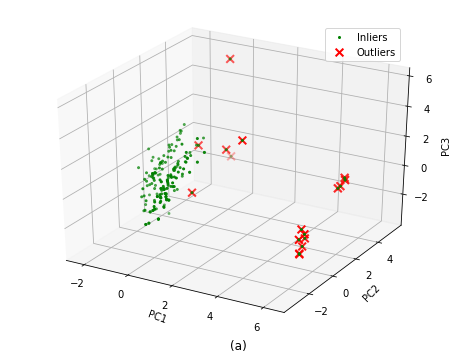

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Reduce to k=3 dimensions
pca = PCA(n_components=3)  
scaler = StandardScaler()

df2['Outliers']=y_pred
outliers=df2.loc[df2['Outliers']==-1]
outlier_index=list(outliers.index)
print(df2['Outliers'].value_counts())

#normalize the metrics
X_Std = scaler.fit_transform(df2)
X_reduce = pca.fit_transform(X_Std)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("PC1", rotation = -20)
ax.set_ylabel("PC2", rotation = 45)
ax.set_zlabel("PC3", rotation = 90)
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="Inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="Outliers")
ax.legend(loc='upper left', bbox_to_anchor=(0.7, .95))
ax.text2D(0.5,-0.05, "(a)", transform=ax.transAxes, fontsize=12)
plt.show()

It is clear that the anomaly points are mostly separated from the cluster of normal points. 

In [30]:
y.head()

0    0
4    1
5    1
6    0
7    1
Name: Migration resistance, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

In [31]:
# count the target class labels after outlier removed 
y.value_counts()

2    91
0    29
3    27
1    24
4    12
Name: Migration resistance, dtype: int64

In [32]:
# count the target class labels before outlier removed 

df2['Migration resistance'].value_counts()

2    97
0    33
3    32
1    26
4    16
Name: Migration resistance, dtype: int64

Text(0, 0.5, 'Counts')

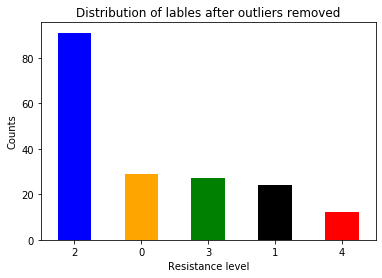

In [33]:
# Visualize the distribution of class labels after outlier removed 
color = ['blue','orange', 'green', 'black','red']
y.value_counts().plot(kind='bar', title='Distribution of lables after outliers removed', color = color);
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Resistance level")
plt.ylabel("Counts")

It can be observed that outliers ranging from 2 to 6 were detected from each class lable.

Due to the uneven distribution of the classes, the dataset is considered to be imbalanced. Having imbalanced data is one of the most difficult problems in machine learning classification tasks. Because the classifier model should not be geared towards only recognizing the majority class ,but should also give equal importance to the minority class. Therefore, the imbalanced data must first be resolved prior to model training.

## Handling imbalanced data

Synthetic Minority Oversampling Technique or SMOTE cab be applied to address the problem of the imbalanced classes. This technique oversamples the minority class by simply generating data points on the line segment connecting a randomly chosen data point and one of its K-nearest neighbors.

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# transform the dataset to array
X_arr = np.array(X) 
y_arr = np.array(y)

oversample = SMOTE()
X, y = oversample.fit_resample(X_arr, y_arr)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.2f%%)' % (k, v, per))   

Class=0, n=91 (20.00%)
Class=1, n=91 (20.00%)
Class=2, n=91 (20.00%)
Class=3, n=91 (20.00%)
Class=4, n=91 (20.00%)


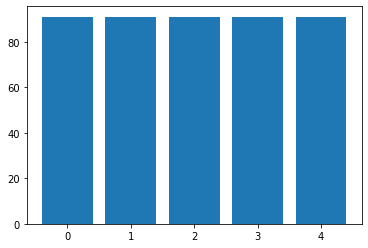

In [35]:
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

All minority classes have now been oversampled, and each class now has 91 presentations as of the majority of the class before treating the imbalance classes. 

## Feature scaling

Normalization and standardization are two approaches to scaling features onto the same scale. Even if normalization is a commonly used technique for obtaining values in a bounded interval, standardization can be more practical for many machine learning algorithms, particularly optimization algorithms like gradient descent. This is because many linear models, such as logistic regressions and SVM that set the weights to zero or small random values close to zero. 

Let us first standardize the dataset because some of the learning algorithms that will be used, such as KNN and SVM, require feature scaling.

In [ ]:
# Standardize features
X= preprocessing.StandardScaler().fit(X).transform(X)

In standardization, the mean of each feature is centered at zero, and each feature has a standard deviation of one, resulting in the property of a standard normal distribution, which makes learning the weights easier.

Let's visualize the distribution of one future (for example the feature 'Cement content') before and after standardization.

In [ ]:
# The feature cement content before feature scaling
cem_dist1 = X_arr[:,2]

# The feature cement content after feature scaling
cem_dist2=X[:, 2]

n_bins=30

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(cem_dist1, bins=n_bins)
# displaying the title
axs[0].set_title('before feature scaling')

axs[1].hist(cem_dist2, bins=n_bins)
axs[1].set_title('after feature scaling')


In [ ]:
# Write cem_dist1 and cem_dist2 in an Excel sheet to visualize with another tool.

import pandas as pd

## convert your array into a dataframe
cem_dist12 = pd.DataFrame (cem_dist1)
cem_dist22 = pd.DataFrame (cem_dist2)

## save to xlsx file

cem_dist12.to_excel("cem_dist1.xlsx",sheet_name='Before_FS')  
cem_dist22.to_excel("cem_dist2.xlsx",sheet_name='After_FS')  

## Data Partitioning

Training/test partitioning usually involves splitting the data into a training and a test set in a predetermined ratio. The training set is used to train the model, whereas the test set is used to evaluate the performance of the trained models against data it has never seen before. 

Let's divide the data into two parts: 80% and 20%. Eighty percent of the data will be used for model training, with the remaining twenty percent used to test the model's performance.

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Model Training

## Naïve  Bayes

There are several Naïve Bayes classifiers, including Bernoulli, Multinomial, and Gaussian. **Gaussian** type is used in this work because it is better suited for continuous/real-valued features.

In [37]:
start_time = datetime.now()

from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()

param_grid_NB = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 
                                   1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                }
grid_search_model_NB = GridSearchCV(gaussian_nb, param_grid_NB, cv=5, verbose=5, return_train_score=True, n_jobs=-1)
grid_search_model_NB.fit(X_train, y_train)

print(f'Best Score: {grid_search_model_NB.best_score_}')
print(f'Best Param: {grid_search_model_NB.best_params_}')

## fitting the best model
best_model_NB = grid_search_model_NB.best_estimator_

best_model_NB.fit(X_train, y_train)
end_time = datetime.now()

print(f'Train Score: {best_model_NB.score(X_train, y_train)}')
print(f'Test Score: {best_model_NB.score(X_test, y_test)}')
print('NB: Duration: {}'.format(end_time - start_time))


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score: 0.637290715372907
Best Param: {'var_smoothing': 0.01}
Train Score: 0.6675824175824175
Test Score: 0.6593406593406593
NB: Duration: 0:00:02.737435


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.6s finished


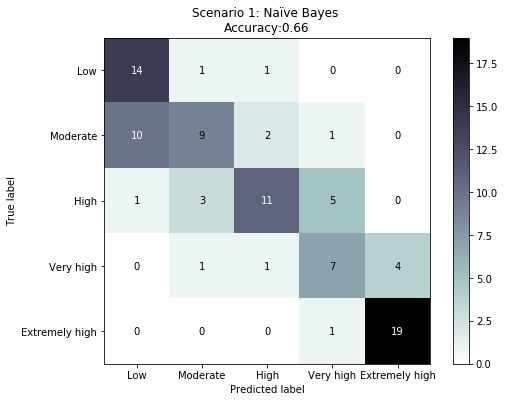

In [38]:
Class_labels = ['Low', 'Moderate', 'High', 'Very high', 'Extremely high']
plt.figure(figsize = (8,6))
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, best_model_NB.predict(X_test)), xlabel='Predicted label',
    ylabel='True label', xticklabels=Class_labels,
    yticklabels=Class_labels, cmap=plt.cm.bone_r, fmt="%d")
plt.title('Scenario 1: Naïve Bayes \nAccuracy:{0:.2f}'.format(accuracy_score(y_test, best_model_NB.predict(X_test))))
plt.gca().invert_yaxis()
plt.colorbar(scores_image)

In [39]:
print (metrics.classification_report(y_test, best_model_NB.predict(X_test),target_names=Class_labels ))

                precision    recall  f1-score   support

           Low       0.56      0.88      0.68        16
      Moderate       0.64      0.41      0.50        22
          High       0.73      0.55      0.63        20
     Very high       0.50      0.54      0.52        13
Extremely high       0.83      0.95      0.88        20

      accuracy                           0.66        91
     macro avg       0.65      0.66      0.64        91
  weighted avg       0.67      0.66      0.65        91



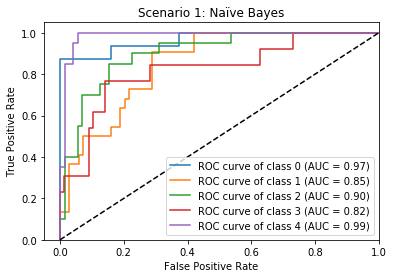

In [40]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# number of classes
n_classes = len(np.unique(y_test))

pred_prob_NB = best_model_NB.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_NB[:,i], pos_label=i)
    roc_auc[i] = auc( fpr[i], tpr[i])
    
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scenario 1: Naïve Bayes')
plt.legend(loc="lower right")
plt.show()

In [41]:
# One-vs-One
macro_roc_auc_ovo = roc_auc_score(y_test, pred_prob_NB, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_prob_NB, multi_class="ovo", average="weighted")

# One-vs-Rest
macro_roc_auc_ovr = roc_auc_score(y_test, pred_prob_NB, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_prob_NB, multi_class="ovr", average="weighted")

print("One-vs-One AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("One-vs-Rest AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One AUROC scores:
0.9059 (macro),
0.9061 (weighted by prevalence)
One-vs-Rest AUROC scores:
0.9053 (macro),
0.9077 (weighted by prevalence)


## k-Nearest Neighbors

In [42]:
start_time = datetime.now()

from sklearn.neighbors import KNeighborsClassifier

#Prepare and train the model

knn = KNeighborsClassifier()

## grid search to find the best model parameter

param_grid_knn= [{'n_neighbors': list(range(1, 40)), 
                  'weights':  ['uniform', 'distance']}]

grid_search_model_knn = GridSearchCV(knn, param_grid_knn, cv=5, return_train_score=True, n_jobs=-1)
grid_search_model_knn.fit(X_train, y_train)


print(f'Best Score: {grid_search_model_knn.best_score_}')
print(f'Best Param: {grid_search_model_knn.best_params_}')

## fitting the best model
best_model_KNN = grid_search_model_knn.best_estimator_

best_model_KNN.fit(X_train, y_train)
end_time = datetime.now()

print(f'Train Score: {best_model_KNN.score(X_train, y_train)}')
print(f'Test Score: {best_model_KNN.score(X_test, y_test)}')
print('KNN: Duration: {}'.format(end_time - start_time))


Best Score: 0.8790715372907154
Best Param: {'n_neighbors': 1, 'weights': 'uniform'}
Train Score: 1.0
Test Score: 0.8791208791208791
KNN: Duration: 0:00:04.000707


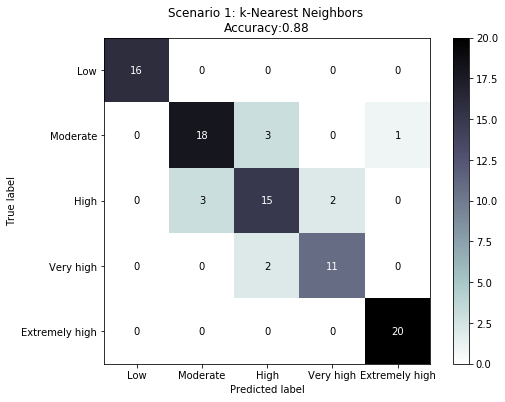

In [43]:
Class_labels = ['Low', 'Moderate', 'High', 'Very high', 'Extremely high']
plt.figure(figsize = (8,6))
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, best_model_KNN.predict(X_test)), xlabel='Predicted label',
    ylabel='True label', xticklabels=Class_labels,
    yticklabels=Class_labels, cmap=plt.cm.bone_r, fmt="%d")
plt.title('Scenario 1: k-Nearest Neighbors \nAccuracy:{0:.2f}'.format(accuracy_score(y_test, best_model_KNN.predict(X_test))))
plt.gca().invert_yaxis()
plt.colorbar(scores_image)

In [44]:
print (metrics.classification_report(y_test, best_model_KNN.predict(X_test),target_names=Class_labels ))

                precision    recall  f1-score   support

           Low       1.00      1.00      1.00        16
      Moderate       0.86      0.82      0.84        22
          High       0.75      0.75      0.75        20
     Very high       0.85      0.85      0.85        13
Extremely high       0.95      1.00      0.98        20

      accuracy                           0.88        91
     macro avg       0.88      0.88      0.88        91
  weighted avg       0.88      0.88      0.88        91



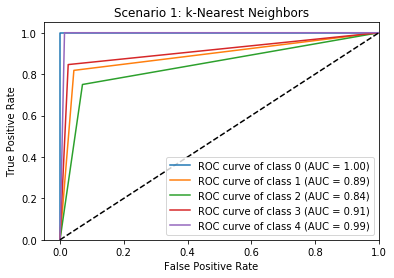

In [45]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# number of classes
n_classes = len(np.unique(y_test))

pred_prob_KNN = best_model_KNN.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_KNN[:,i], pos_label=i)
    roc_auc[i] = auc( fpr[i], tpr[i])
    
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scenario 1: k-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()

In [46]:
# One-vs-One
macro_roc_auc_ovo = roc_auc_score(y_test, pred_prob_KNN, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_prob_KNN, multi_class="ovo", average="weighted")

# One-vs-Rest
macro_roc_auc_ovr = roc_auc_score(y_test, pred_prob_KNN, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_prob_KNN, multi_class="ovr", average="weighted")

print("One-vs-One AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("One-vs-Rest AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One AUROC scores:
0.9268 (macro),
0.9254 (weighted by prevalence)
One-vs-Rest AUROC scores:
0.9261 (macro),
0.9232 (weighted by prevalence)


## Decision Tree

In [47]:
start_time = datetime.now()

#Prepare and train the model

DT=DecisionTreeClassifier()


## grid search to find the best model parameter

param_grid_dt = [{'criterion': ['entropy', 'gini'], 
                  'ccp_alpha': [0.1, 0.01, 0.001],
                    'max_depth': ['none', 5, 6, 7, 8, 9, 10, 20, 40, 100, 200, 500],
                   'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1,2,3,4,5,6]}]

grid_search_model_dt = GridSearchCV(DT, param_grid_dt, cv=5, return_train_score=True, n_jobs=-1)
grid_search_model_dt.fit(X_train, y_train)


print(f'Best Score: {grid_search_model_dt.best_score_}')
print(f'Best Param: {grid_search_model_dt.best_params_}')

## fitting the best model
best_model_dt = grid_search_model_dt.best_estimator_

best_model_dt.fit(X_train, y_train)
end_time = datetime.now()

print(f'Train Score: {best_model_dt.score(X_train, y_train)}')
print(f'Test Score: {best_model_dt.score(X_test, y_test)}')
print('DT: Duration: {}'.format(end_time - start_time))

Best Score: 0.8269406392694062
Best Param: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 500, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Score: 1.0
Test Score: 0.8571428571428571
DT: Duration: 0:00:13.029235


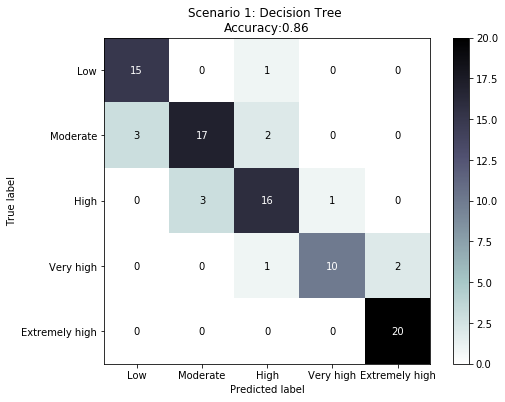

In [48]:
Class_labels = ['Low', 'Moderate', 'High', 'Very high','Extremely high']
plt.figure(figsize = (8,6))
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, best_model_dt.predict(X_test)), xlabel='Predicted label',
    ylabel='True label', xticklabels=Class_labels,
    yticklabels=Class_labels, cmap=plt.cm.bone_r, fmt="%d")
plt.title('Scenario 1: Decision Tree \nAccuracy:{0:.2f}'.format(accuracy_score(y_test, best_model_dt.predict(X_test))))
plt.gca().invert_yaxis()
plt.colorbar(scores_image)

In [49]:
print (metrics.classification_report(y_test, best_model_dt.predict(X_test),target_names=Class_labels ))

                precision    recall  f1-score   support

           Low       0.83      0.94      0.88        16
      Moderate       0.85      0.77      0.81        22
          High       0.80      0.80      0.80        20
     Very high       0.91      0.77      0.83        13
Extremely high       0.91      1.00      0.95        20

      accuracy                           0.86        91
     macro avg       0.86      0.86      0.86        91
  weighted avg       0.86      0.86      0.86        91



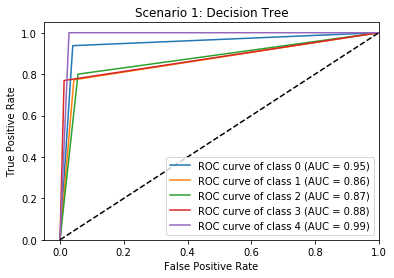

In [50]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# number of classes
n_classes = len(np.unique(y_test))

pred_prob_dt = best_model_dt.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_dt[:,i], pos_label=i)
    roc_auc[i] = auc( fpr[i], tpr[i])
    
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scenario 1: Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [51]:
# One-vs-One
macro_roc_auc_ovo = roc_auc_score(y_test, pred_prob_dt, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_prob_dt, multi_class="ovo", average="weighted")

# One-vs-Rest
macro_roc_auc_ovr = roc_auc_score(y_test, pred_prob_dt, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_prob_dt, multi_class="ovr", average="weighted")

print("One-vs-One AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("One-vs-Rest AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One AUROC scores:
0.9099 (macro),
0.9098 (weighted by prevalence)
One-vs-Rest AUROC scores:
0.9099 (macro),
0.9096 (weighted by prevalence)


## Support Vector Machine

In [52]:
start_time = datetime.now()


from sklearn.svm import SVC

#Prepare and train the model

svm = SVC(probability=True)

## grid search to find the best model parameter

param_grid_svm = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search_model_svm = GridSearchCV(svm, param_grid_svm, cv=5, return_train_score=True, n_jobs=-1)
grid_search_model_svm.fit(X_train, y_train)


print(f'Best Score: {grid_search_model_svm.best_score_}')
print(f'Best Param: {grid_search_model_svm.best_params_}')

## fitting the best model
best_model_svm = grid_search_model_svm.best_estimator_

best_model_svm.fit(X_train, y_train)
end_time = datetime.now()

print(f'Train Score: {best_model_svm.score(X_train, y_train)}')
print(f'Test Score: {best_model_svm.score(X_test, y_test)}')
print('SVM: Duration: {}'.format(end_time - start_time))


Best Score: 0.8873287671232877
Best Param: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Train Score: 0.9642857142857143
Test Score: 0.8791208791208791
SVM: Duration: 0:00:06.439900


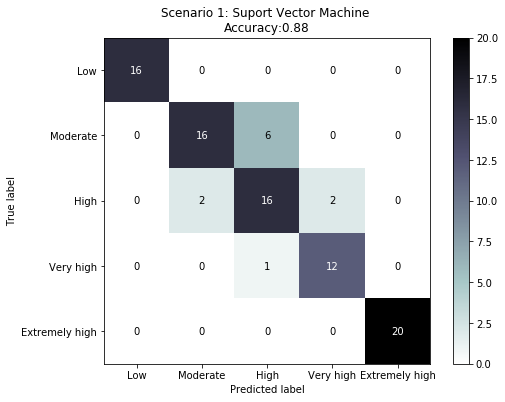

In [53]:
Class_labels = ['Low', 'Moderate', 'High', 'Very high','Extremely high']
plt.figure(figsize = (8,6))
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, best_model_svm.predict(X_test)), xlabel='Predicted label',
    ylabel='True label', xticklabels=Class_labels,
    yticklabels=Class_labels, cmap=plt.cm.bone_r, fmt="%d")
plt.title('Scenario 1: Suport Vector Machine \nAccuracy:{0:.2f}'.format(accuracy_score(y_test, best_model_svm.predict(X_test))))
plt.gca().invert_yaxis()
plt.colorbar(scores_image)

In [54]:
print (metrics.classification_report(y_test, best_model_svm.predict(X_test),target_names=Class_labels ))

                precision    recall  f1-score   support

           Low       1.00      1.00      1.00        16
      Moderate       0.89      0.73      0.80        22
          High       0.70      0.80      0.74        20
     Very high       0.86      0.92      0.89        13
Extremely high       1.00      1.00      1.00        20

      accuracy                           0.88        91
     macro avg       0.89      0.89      0.89        91
  weighted avg       0.89      0.88      0.88        91



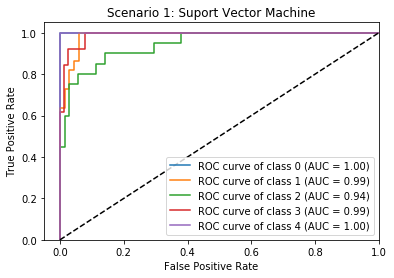

In [55]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# number of classes
n_classes = len(np.unique(y_test))

pred_prob_svm = best_model_svm.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_svm[:,i], pos_label=i)
    roc_auc[i] = auc( fpr[i], tpr[i])
    
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scenario 1: Suport Vector Machine')
plt.legend(loc="lower right")
plt.show()

In [56]:
# One-vs-One
macro_roc_auc_ovo = roc_auc_score(y_test, pred_prob_svm, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_prob_svm, multi_class="ovo", average="weighted")

# One-vs-Rest
macro_roc_auc_ovr = roc_auc_score(y_test, pred_prob_svm, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_prob_svm, multi_class="ovr", average="weighted")

print("One-vs-One AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("One-vs-Rest AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One AUROC scores:
0.9845 (macro),
0.9839 (weighted by prevalence)
One-vs-Rest AUROC scores:
0.9839 (macro),
0.9829 (weighted by prevalence)


## Random Forest

In [37]:
start_time = datetime.now()

rf = RandomForestClassifier()

param_grid_rf = {'max_depth': [2, 4, 5,6],
                'max_features':[1,2,3,4],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [4, 6, 8, 10],
                'criterion' :['gini', 'entropy'],
                'n_estimators': [10, 50, 100]}

grid_search_model_rf = GridSearchCV(rf, param_grid = param_grid_rf,cv = 5, n_jobs = -1, verbose = 2)
grid_search_model_rf.fit(X_train, y_train)

print(f'Best Score: {grid_search_model_rf.best_score_}')
print(f'Best Param: {grid_search_model_rf.best_params_}')

## fitting the best model

best_model_rf = grid_search_model_rf.best_estimator_
best_model_rf.fit(X_train, y_train)

end_time = datetime.now()

print(f'Train Score: {best_model_rf.score(X_train, y_train)}')
print(f'Test Score: {best_model_rf.score(X_test, y_test)}')
print('Random Forest: Duration: {}'.format(end_time - start_time))

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 1574 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 2464 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3301 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3908 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4597 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 5366 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  5.1min finished


Best Score: 0.8434170471841703
Best Param: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 50}
Train Score: 0.8928571428571429
Test Score: 0.8571428571428571
Random Forest: Duration: 0:05:05.173139


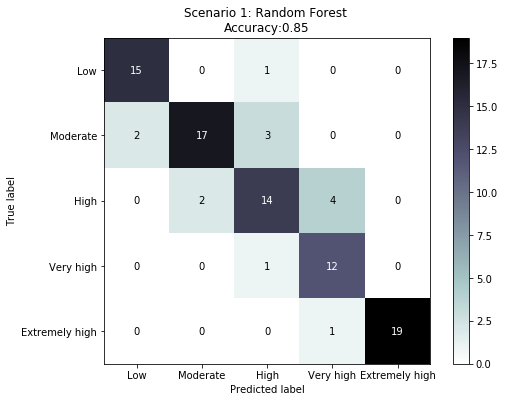

In [58]:
Class_labels = ['Low', 'Moderate', 'High', 'Very high','Extremely high']
plt.figure(figsize = (8,6))
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, best_model_rf.predict(X_test)), xlabel='Predicted label',
    ylabel='True label', xticklabels=Class_labels,
    yticklabels=Class_labels, cmap=plt.cm.bone_r, fmt="%d")
plt.title('Scenario 1: Random Forest \nAccuracy:{0:.2f}'.format(accuracy_score(y_test, best_model_rf.predict(X_test))))
plt.gca().invert_yaxis()
plt.colorbar(scores_image)

In [59]:
print (metrics.classification_report(y_test, best_model_rf.predict(X_test),target_names=Class_labels))

                precision    recall  f1-score   support

           Low       0.88      0.94      0.91        16
      Moderate       0.89      0.77      0.83        22
          High       0.74      0.70      0.72        20
     Very high       0.71      0.92      0.80        13
Extremely high       1.00      0.95      0.97        20

      accuracy                           0.85        91
     macro avg       0.84      0.86      0.85        91
  weighted avg       0.85      0.85      0.85        91



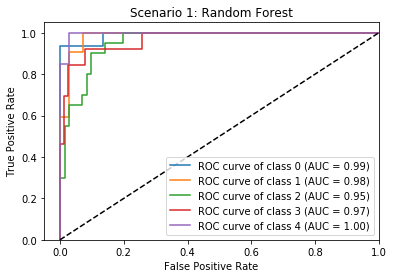

In [60]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# number of classes
n_classes = len(np.unique(y_test))

pred_prob_rf = best_model_rf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_rf[:,i], pos_label=i)
    roc_auc[i] = auc( fpr[i], tpr[i])
    
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scenario 1: Random Forest')
plt.legend(loc="lower right")
plt.show()

In [61]:
# One-vs-One
macro_roc_auc_ovo = roc_auc_score(y_test, pred_prob_rf, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_prob_rf, multi_class="ovo", average="weighted")

# One-vs-Rest
macro_roc_auc_ovr = roc_auc_score(y_test, pred_prob_rf, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_prob_rf, multi_class="ovr", average="weighted")

print("One-vs-One AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("One-vs-Rest AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One AUROC scores:
0.9782 (macro),
0.9786 (weighted by prevalence)
One-vs-Rest AUROC scores:
0.9788 (macro),
0.9792 (weighted by prevalence)


# <div class="alert alert-block alert-info"><b><font color='red'> Scenario: 2 <font color='red'> </b> </div>

In [62]:
# Let us creat a data set after removing unecessary feature
df3= df0.drop(columns=['Lime filler','Plasticizer','Air entraining'])
df3.head(2)

,w/b,Water,Cement type,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age,Migration resistance
0,0.55,192.5,CEM I,350.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,28,Low
1,0.55,192.5,CEM II/A-D,329.0,0.0,0.0,21.0,694.766,1059.600,1754.366,0.0,28,Moderate


In [63]:
df3['Migration resistance'].value_counts()

High              97
Low               33
Very high         32
Moderate          26
Extremely high    16
Name: Migration resistance, dtype: int64

## Encoding Categorical Data 

In [64]:
# Examine  the data types of all features considered in the dataframe
df3.dtypes

w/b                     float64
Water                   float64
Cement type              object
Cement                  float64
Slag                    float64
Fly ash                 float64
Silica fume             float64
Fine aggregate          float64
Coarse aggregate        float64
Total aggregate         float64
Superplasticizer        float64
Migration test age        int64
Migration resistance     object
dtype: object

It can be noticed that the data types of cement type and Migration resistance read as object. This is because the data of these features are non-numerical. The data type of this feature shall be transformed from non-numerical labels to numerical labels using label encoder.

Now let's convert a "Cement type" and "Migration resistance" column to a category as it is a prerequisite for encoding.

In [65]:
df3 = df3.astype({"Cement type": "category", "Migration resistance": "category"})
# Sanity check
df3.dtypes

w/b                      float64
Water                    float64
Cement type             category
Cement                   float64
Slag                     float64
Fly ash                  float64
Silica fume              float64
Fine aggregate           float64
Coarse aggregate         float64
Total aggregate          float64
Superplasticizer         float64
Migration test age         int64
Migration resistance    category
dtype: object

Let's look at the cement type labels.

In [66]:
df3['Cement type'].unique()

[CEM I, CEM II/A-D, CEM II/A-V, CEM II/B-V, CEM III/A, CEM II/B-S, CEM IV/A]
Categories (7, object): [CEM I, CEM II/A-D, CEM II/A-V, CEM II/B-V, CEM III/A, CEM II/B-S, CEM IV/A]

There are only seven different types of cement, which can be divided into four categories (CEM I, CEM II, CEM III, and CEM IV). Although they are divided into four major groups, there are no orders or scales for group numbering. As a result, the cement type categorical data is considered nominal rather than ordinal. When converting categorical data (with nominal data type) to numeric data, one-hot encoding is the best option. It assigns binary numbers to each category (0 or 1).

Let us now investigate the class labels of the feature Migration resistance. 

In [67]:
df3['Migration resistance'].unique()

[Low, Moderate, High, Very high, Extremely high]
Categories (5, object): [Low, Moderate, High, Very high, Extremely high]

Though label encoding techniques that encode labels with values ranging from 0 to no of class -1 are the best option for converting the labels of the feature "Migration resistance", they could be manually encoded to avoid random labeling.

### One-Hot Encoding for "Cement type"

In [68]:
# Convert the values in the Cem_type_cat column into one-hot encoded vectors
df3=pd.get_dummies(df3, columns=["Cement type"])
df3.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age,Migration resistance,Cement type_CEM I,Cement type_CEM II/A-D,Cement type_CEM II/A-V,Cement type_CEM II/B-S,Cement type_CEM II/B-V,Cement type_CEM III/A,Cement type_CEM IV/A
0,0.55,192.5,350.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,28,Low,1,0,0,0,0,0,0
1,0.55,192.5,329.0,0.0,0.0,21.0,694.766,1059.600,1754.366,0.0,28,Moderate,0,1,0,0,0,0,0


In [69]:
#Shift column 'Migration resistance' to end position
end_column = df3.pop('Migration resistance')

# Determine the postion
position_all_ing = len(df3.columns)
 
# Insert column using insert(position,column_name,end_column) function

df3.insert(position_all_ing, 'Migration resistance', end_column)
df3.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age,Cement type_CEM I,Cement type_CEM II/A-D,Cement type_CEM II/A-V,Cement type_CEM II/B-S,Cement type_CEM II/B-V,Cement type_CEM III/A,Cement type_CEM IV/A,Migration resistance
0,0.55,192.5,350.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,28,1,0,0,0,0,0,0,Low
1,0.55,192.5,329.0,0.0,0.0,21.0,694.766,1059.600,1754.366,0.0,28,0,1,0,0,0,0,0,Moderate


### Label encoding for "Migration resistance"

The labels Low, Moderate, High, Very High, and Extremely High are encoded as 0, 1, 2, 3, and 4, respectively. It makes sense if the algorithm interprets the resistance level as as 0 < 1 < 2 < 3 < 4, that is, Low < Moderate < High < Very high < Extremely high.

In [70]:
# replacing values
df3['Migration resistance'].replace(['Low', 'Moderate','High','Very high','Extremely high'],
                        [0,1,2,3,4], inplace=True)
df3.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age,Cement type_CEM I,Cement type_CEM II/A-D,Cement type_CEM II/A-V,Cement type_CEM II/B-S,Cement type_CEM II/B-V,Cement type_CEM III/A,Cement type_CEM IV/A,Migration resistance
0,0.55,192.5,350.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,28,1,0,0,0,0,0,0,0
1,0.55,192.5,329.0,0.0,0.0,21.0,694.766,1059.600,1754.366,0.0,28,0,1,0,0,0,0,0,1


The value of the features Cement type and Migration resistance are now numerical rather than non-numerical. Indeed, because they are categorical features, the transformed data must also be converted to category data types.


In [71]:
# change the features into catagory
df3 = df3.astype({"Cement type_CEM I": "category", "Cement type_CEM II/A-D": "category", 
                  "Cement type_CEM II/A-V": "category","Cement type_CEM II/B-S": "category",
                 "Cement type_CEM II/B-V": "category","Cement type_CEM III/A": "category",
                  "Cement type_CEM IV/A": "category","Migration resistance": "category",
                 })
# Sanity check
df3.dtypes

w/b                        float64
Water                      float64
Cement                     float64
Slag                       float64
Fly ash                    float64
Silica fume                float64
Fine aggregate             float64
Coarse aggregate           float64
Total aggregate            float64
Superplasticizer           float64
Migration test age           int64
Cement type_CEM I         category
Cement type_CEM II/A-D    category
Cement type_CEM II/A-V    category
Cement type_CEM II/B-S    category
Cement type_CEM II/B-V    category
Cement type_CEM III/A     category
Cement type_CEM IV/A      category
Migration resistance      category
dtype: object

## Outlier detection

To isolate anomalies from the data, we'll use isolation forests, one of the most effective outlier detection algorithms. It creates partitions of the dataset by constructing an ensemble of Isolation Trees, with each data point isolated. 

In [72]:
# split into input and output elements
X_1, y_1 =df3.iloc[:, :-1], df3.iloc[:,-1]

# identify outliers in the training dataset
iso = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
y_pred = iso.fit_predict(X_1)

# select all rows that are not outliers
mask = y_pred != -1

X, y = X_1.iloc[mask, :], y_1.iloc[mask]

print('Before outliers removed:', X_1.shape, y_1.shape)

print('After outliers removed:', X.shape, y.shape)

Before outliers removed: (204, 18) (204,)
After outliers removed: (183, 18) (183,)


In [73]:
df3.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age,Cement type_CEM I,Cement type_CEM II/A-D,Cement type_CEM II/A-V,Cement type_CEM II/B-S,Cement type_CEM II/B-V,Cement type_CEM III/A,Cement type_CEM IV/A,Migration resistance
0,0.55,192.5,350.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,28,1,0,0,0,0,0,0,0
1,0.55,192.5,329.0,0.0,0.0,21.0,694.766,1059.600,1754.366,0.0,28,0,1,0,0,0,0,0,1


Text(0, 0.5, 'Counts')

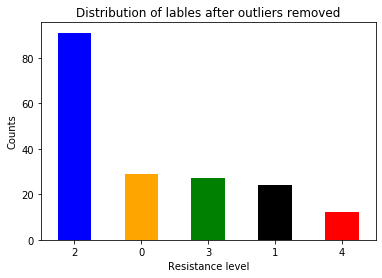

In [74]:
# Visualize the distribution of class labels after outlier removed 
color = ['blue','orange', 'green', 'black','red']
y.value_counts().plot(kind='bar', title='Distribution of lables after outliers removed', color = color);
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Resistance level")
plt.ylabel("Counts")

It can be observed that outliers ranging from 2 to 6 were detected from each class lable.

Due to the uneven distribution of the classes, the dataset is considered to be imbalanced. Having imbalanced data is one of the most difficult problems in machine learning classification tasks. Because the classifier model should not be geared towards only recognizing the majority class ,but should also give equal importance to the minority class. Therefore, the imbalanced data must first be resolved prior to model training.

## Handling imbalanced data

Synthetic Minority Oversampling Technique or SMOTE cab be applied to address the problem of the imbalanced classes. This technique oversamples the minority class by simply generating data points on the line segment connecting a randomly chosen data point and one of its K-nearest neighbors.

In [75]:
# transform the dataset to array
X_arr = np.array(X) 
y_arr = np.array(y)

oversample = SMOTE()
X, y = oversample.fit_resample(X_arr, y_arr)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.2f%%)' % (k, v, per))   

Class=0, n=91 (20.00%)
Class=1, n=91 (20.00%)
Class=2, n=91 (20.00%)
Class=3, n=91 (20.00%)
Class=4, n=91 (20.00%)


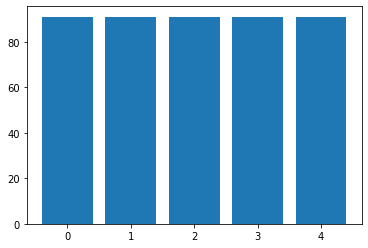

In [76]:
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

All minority classes have now been oversampled, and each class now has 91 presentations as of the majority of the class before treating the imbalance classes. 

## Feature Selection

The embedded technique based on a random forest algorithm can be used to select relevant features from the dataset, since it combines the benefits of the filter and the wrapper approaches in terms of minimal computational effort and adequate accuracy. The random forest measures the importance of a feature as the averaged impurity decrease derived from all decision trees in the forest, without assuming anything about the data.

In [77]:
# Spit the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

Text(0.5, 0, 'Random Forest Feature Importance')

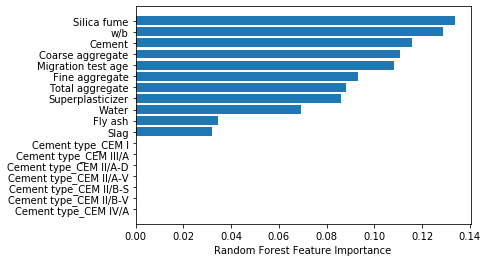

In [78]:
# Train the model using RandomForestRegressor
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

# Determine feature importance values
rf.feature_importances_

# Let’s sort the plot the importances (chart will be easier to interpret than values).
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df3.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

The measures of the feature importance added up to one. Binders (cement, fly ash, slag, and silica fume) collectively have the highest predictive power of the model, accounting for about 32 percent, followed by aggregates (fine, coarse, and total aggregate) at approximately 29 percent. The features w/b ratio, migration test age, and water account for about 13, 11 and 8 percent, respectively. The feature cement types are considered to be powerless predictors for the classification of concrete chloride resistance. 

Write the prediction in an Excel spreadsheet to visualize it with another tool.


In [79]:
# Transform array to DataFrame
Features = pd.DataFrame(df3.columns[sorted_idx])
Score =  pd.DataFrame(rf.feature_importances_[sorted_idx])
Feature_Importance = pd.concat([Features, Score], axis=1) 

# Write the prediction in an Excel sheet to visualize with another tool.

Feature_Importance.to_excel("Feature_Importance_class.xlsx",sheet_name='Corr')  

Let's take into account all features except those that describe cement types, which have been found to be ineffective predictors by the applied feature selection process.

In [80]:
# crate a DataFrame by horizonally stacking X and y
df3_new=pd.DataFrame(np.hstack((X,np.array([y]).T)),columns=df3.columns)

df3_new_1 = df3_new.loc[:,['w/b','Water','Cement', 'Slag', 'Fly ash', 'Silica fume', 'Fine aggregate', 'Coarse aggregate', 
                             'Total aggregate','Superplasticizer','Migration test age', 'Migration resistance']]

df3_new_1.head(2)

,w/b,Water,Cement,Slag,Fly ash,Silica fume,Fine aggregate,Coarse aggregate,Total aggregate,Superplasticizer,Migration test age,Migration resistance
0,0.55,192.5,350.0,0.0,0.0,0.0,699.988,1062.249,1762.237,0.0,28.0,0.0
1,0.35,157.5,450.0,0.0,0.0,0.0,821.943,940.395,1762.338,0.0,28.0,1.0


In [81]:
# check the shape of the DataFrame
df3_new_1.shape

(455, 12)

In [82]:
# check the data type of the DataFrame
df3_new_1.dtypes

w/b                     float64
Water                   float64
Cement                  float64
Slag                    float64
Fly ash                 float64
Silica fume             float64
Fine aggregate          float64
Coarse aggregate        float64
Total aggregate         float64
Superplasticizer        float64
Migration test age      float64
Migration resistance    float64
dtype: object

In [83]:
# convert a DataFrame columns from object to float
df3_new_1 = df3_new_1.astype(str).astype(float)

# convert a DataFrame column "Migration resistanc" from float to category
df3_new_1=df3_new_1.astype({'Migration resistance': 'category'})

# Sanity check
df3_new_1.dtypes

w/b                      float64
Water                    float64
Cement                   float64
Slag                     float64
Fly ash                  float64
Silica fume              float64
Fine aggregate           float64
Coarse aggregate         float64
Total aggregate          float64
Superplasticizer         float64
Migration test age       float64
Migration resistance    category
dtype: object

In [84]:
# load input and target features
X = df3_new_1.iloc[:,0:-1]
y = df3_new_1.iloc[:,-1]

## Feature scaling and data partitioning

Let us first standardize the dataset because some of the learning algorithms that will be used, such as KNN and SVM, require feature scaling. Then split the dataset into two sets: training (80%) and test (20%). 

In [85]:
# Standardize features

X= preprocessing.StandardScaler().fit(X).transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (364, 11) (364,)
Test set: (91, 11) (91,)


# Model Training

## Naive Bayes

In [86]:
start_time = datetime.now()

from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()

param_grid_NB = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 
                                   1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                }
grid_search_model_NB = GridSearchCV(gaussian_nb, param_grid_NB, cv=5, verbose=5, return_train_score=True, n_jobs=-1)
grid_search_model_NB.fit(X_train, y_train)

print(f'Best Score: {grid_search_model_NB.best_score_}')
print(f'Best Param: {grid_search_model_NB.best_params_}')

## fitting the best model
best_model_NB = grid_search_model_NB.best_estimator_

best_model_NB.fit(X_train, y_train)
end_time = datetime.now()

print(f'Train Score: {best_model_NB.score(X_train, y_train)}')
print(f'Test Score: {best_model_NB.score(X_test, y_test)}')
print('KNN: Duration: {}'.format(end_time - start_time))


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.1s finished


Best Score: 0.6647640791476408
Best Param: {'var_smoothing': 0.01}
Train Score: 0.6785714285714286
Test Score: 0.6043956043956044
KNN: Duration: 0:00:01.214303


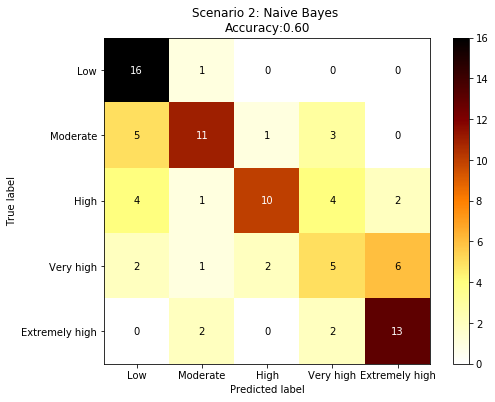

In [87]:
Class_labels = ['Low', 'Moderate', 'High', 'Very high','Extremely high']
plt.figure(figsize = (8,6))
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, best_model_NB.predict(X_test)), xlabel='Predicted label',
    ylabel='True label', xticklabels=Class_labels,
    yticklabels=Class_labels, cmap=plt.cm.afmhot_r, fmt="%d")
plt.title('Scenario 2: Naive Bayes \nAccuracy:{0:.2f}'.format(accuracy_score(y_test, best_model_NB.predict(X_test))))
plt.gca().invert_yaxis()
plt.colorbar(scores_image)

In [88]:
print (metrics.classification_report(y_test, best_model_NB.predict(X_test),target_names=Class_labels ))

                precision    recall  f1-score   support

           Low       0.59      0.94      0.73        17
      Moderate       0.69      0.55      0.61        20
          High       0.77      0.48      0.59        21
     Very high       0.36      0.31      0.33        16
Extremely high       0.62      0.76      0.68        17

      accuracy                           0.60        91
     macro avg       0.61      0.61      0.59        91
  weighted avg       0.62      0.60      0.59        91



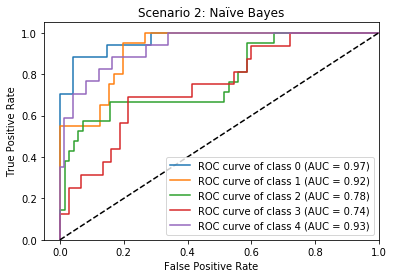

In [89]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# number of classes
n_classes = len(np.unique(y_test))

pred_prob_NB = best_model_NB.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_NB[:,i], pos_label=i)
    roc_auc[i] = auc( fpr[i], tpr[i])
    
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scenario 2: Naïve Bayes')
plt.legend(loc="lower right")
plt.show()

In [90]:
# One-vs-One
macro_roc_auc_ovo = roc_auc_score(y_test, pred_prob_NB, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_prob_NB, multi_class="ovo", average="weighted")

# One-vs-Rest
macro_roc_auc_ovr = roc_auc_score(y_test, pred_prob_NB, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_prob_NB, multi_class="ovr", average="weighted")

print("One-vs-One AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("One-vs-Rest AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One AUROC scores:
0.8715 (macro),
0.8703 (weighted by prevalence)
One-vs-Rest AUROC scores:
0.8696 (macro),
0.8687 (weighted by prevalence)


## k-Nearest Neighbors

In [91]:
start_time = datetime.now()

from sklearn.neighbors import KNeighborsClassifier

#Prepare and train the model

knn = KNeighborsClassifier()

## grid search to find the best model parameter

param_grid_knn= [{'n_neighbors': list(range(1, 40)), 
                  'weights':  ['uniform', 'distance']}]

grid_search_model_knn = GridSearchCV(knn, param_grid_knn, cv=5, return_train_score=True, n_jobs=-1)
grid_search_model_knn.fit(X_train, y_train)


print(f'Best Score: {grid_search_model_knn.best_score_}')
print(f'Best Param: {grid_search_model_knn.best_params_}')

## fitting the best model
best_model_KNN = grid_search_model_knn.best_estimator_

best_model_KNN.fit(X_train, y_train)
end_time = datetime.now()

print(f'Train Score: {best_model_KNN.score(X_train, y_train)}')
print(f'Test Score: {best_model_KNN.score(X_test, y_test)}')
print('KNN: Duration: {}'.format(end_time - start_time))


Best Score: 0.8900684931506848
Best Param: {'n_neighbors': 1, 'weights': 'uniform'}
Train Score: 1.0
Test Score: 0.8681318681318682
KNN: Duration: 0:00:03.124210


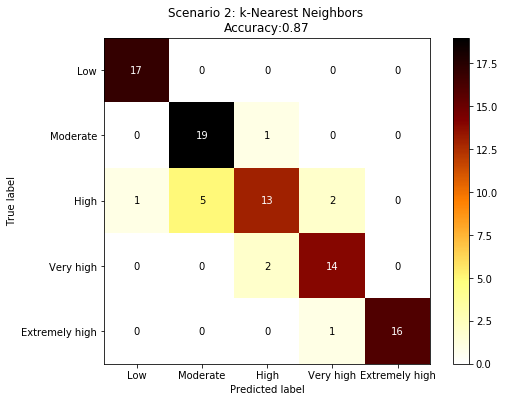

In [92]:
Class_labels = ['Low', 'Moderate', 'High', 'Very high','Extremely high']
plt.figure(figsize = (8,6))
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, best_model_KNN.predict(X_test)), xlabel='Predicted label',
    ylabel='True label', xticklabels=Class_labels,
    yticklabels=Class_labels, cmap=plt.cm.afmhot_r, fmt="%d")
plt.title('Scenario 2: k-Nearest Neighbors \nAccuracy:{0:.2f}'.format(accuracy_score(y_test, best_model_KNN.predict(X_test))))
plt.gca().invert_yaxis()
plt.colorbar(scores_image)

In [93]:
print (metrics.classification_report(y_test, best_model_KNN.predict(X_test),target_names=Class_labels ))

                precision    recall  f1-score   support

           Low       0.94      1.00      0.97        17
      Moderate       0.79      0.95      0.86        20
          High       0.81      0.62      0.70        21
     Very high       0.82      0.88      0.85        16
Extremely high       1.00      0.94      0.97        17

      accuracy                           0.87        91
     macro avg       0.87      0.88      0.87        91
  weighted avg       0.87      0.87      0.86        91



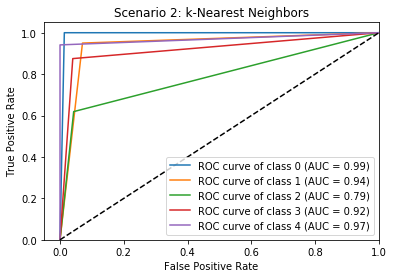

In [94]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# number of classes
n_classes = len(np.unique(y_test))

pred_prob_KNN = best_model_KNN.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_KNN[:,i], pos_label=i)
    roc_auc[i] = auc( fpr[i], tpr[i])
    
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scenario 2: k-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()

In [95]:
# One-vs-One
macro_roc_auc_ovo = roc_auc_score(y_test, pred_prob_KNN, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_prob_KNN, multi_class="ovo", average="weighted")

# One-vs-Rest
macro_roc_auc_ovr = roc_auc_score(y_test, pred_prob_KNN, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_prob_KNN, multi_class="ovr", average="weighted")

print("One-vs-One AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("One-vs-Rest AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One AUROC scores:
0.9232 (macro),
0.9206 (weighted by prevalence)
One-vs-Rest AUROC scores:
0.9218 (macro),
0.9166 (weighted by prevalence)


## Decision Tree 

In [96]:
start_time = datetime.now()

#Prepare and train the model

DT=DecisionTreeClassifier()


## grid search to find the best model parameter

param_grid_dt = [{'criterion': ['entropy', 'gini'], 
                  'ccp_alpha': [0.1, 0.01, 0.001],
                    'max_depth': ['none', 5, 6, 7, 8, 9, 10, 20, 40, 100, 200, 500],
                   'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1,2,3,4,5,6]}]

grid_search_model_dt = GridSearchCV(DT, param_grid_dt, cv=5, return_train_score=True, n_jobs=-1)
grid_search_model_dt.fit(X_train, y_train)


print(f'Best Score: {grid_search_model_dt.best_score_}')
print(f'Best Param: {grid_search_model_dt.best_params_}')

## fitting the best model
best_model_dt = grid_search_model_dt.best_estimator_

best_model_dt.fit(X_train, y_train)
end_time = datetime.now()

print(f'Train Score: {best_model_dt.score(X_train, y_train)}')
print(f'Test Score: {best_model_dt.score(X_test, y_test)}')
print('DT: Duration: {}'.format(end_time - start_time))

Best Score: 0.8517884322678843
Best Param: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 500, 'min_samples_leaf': 3, 'min_samples_split': 5}
Train Score: 0.9340659340659341
Test Score: 0.8131868131868132
DT: Duration: 0:00:15.012394


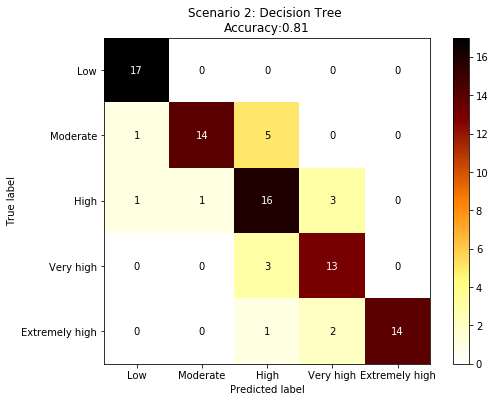

In [97]:
Class_labels = ['Low', 'Moderate', 'High', 'Very high','Extremely high']
plt.figure(figsize = (8,6))
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, best_model_dt.predict(X_test)), xlabel='Predicted label',
    ylabel='True label', xticklabels=Class_labels,
    yticklabels=Class_labels, cmap=plt.cm.afmhot_r, fmt="%d")
plt.title('Scenario 2: Decision Tree \nAccuracy:{0:.2f}'.format(accuracy_score(y_test, best_model_dt.predict(X_test))))
plt.gca().invert_yaxis()
plt.colorbar(scores_image)

In [98]:
print (metrics.classification_report(y_test, best_model_dt.predict(X_test),target_names=Class_labels))

                precision    recall  f1-score   support

           Low       0.89      1.00      0.94        17
      Moderate       0.93      0.70      0.80        20
          High       0.64      0.76      0.70        21
     Very high       0.72      0.81      0.76        16
Extremely high       1.00      0.82      0.90        17

      accuracy                           0.81        91
     macro avg       0.84      0.82      0.82        91
  weighted avg       0.83      0.81      0.82        91



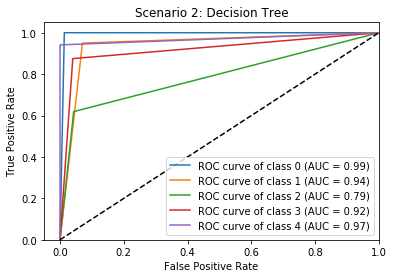

In [99]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# number of classes
n_classes = len(np.unique(y_test))

pred_prob_dt = best_model_dt.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_KNN[:,i], pos_label=i)
    roc_auc[i] = auc( fpr[i], tpr[i])
    
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scenario 2: Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [100]:
# One-vs-One
macro_roc_auc_ovo = roc_auc_score(y_test, pred_prob_dt, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_prob_dt, multi_class="ovo", average="weighted")

# One-vs-Rest
macro_roc_auc_ovr = roc_auc_score(y_test, pred_prob_dt, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_prob_dt, multi_class="ovr", average="weighted")

print("One-vs-One AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("One-vs-Rest AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One AUROC scores:
0.9184 (macro),
0.9174 (weighted by prevalence)
One-vs-Rest AUROC scores:
0.9176 (macro),
0.9161 (weighted by prevalence)


## Suport Vector Machine

In [101]:
start_time = datetime.now()


from sklearn.svm import SVC

#Prepare and train the model

svm = SVC(probability=True)

## grid search to find the best model parameter

param_grid_svm = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search_model_svm = GridSearchCV(svm, param_grid_svm, cv=5, return_train_score=True, n_jobs=-1)
grid_search_model_svm.fit(X_train, y_train)


print(f'Best Score: {grid_search_model_svm.best_score_}')
print(f'Best Param: {grid_search_model_svm.best_params_}')

## fitting the best model
best_model_svm = grid_search_model_svm.best_estimator_

best_model_svm.fit(X_train, y_train)
end_time = datetime.now()

print(f'Train Score: {best_model_svm.score(X_train, y_train)}')
print(f'Test Score: {best_model_svm.score(X_test, y_test)}')
print('SVM: Duration: {}'.format(end_time - start_time))


Best Score: 0.9065449010654489
Best Param: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Train Score: 0.9917582417582418
Test Score: 0.8901098901098901
SVM: Duration: 0:00:05.047103


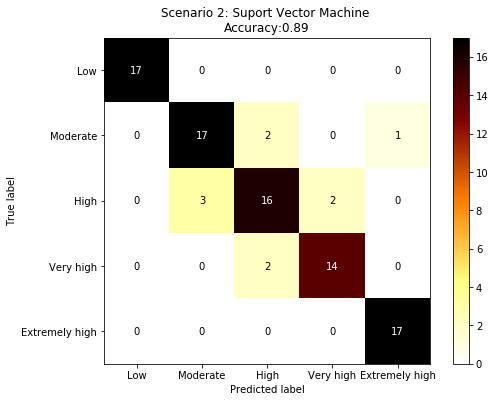

In [102]:
Class_labels = ['Low', 'Moderate', 'High', 'Very high','Extremely high']
plt.figure(figsize = (8,6))
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, best_model_svm.predict(X_test)), xlabel='Predicted label',
    ylabel='True label', xticklabels=Class_labels,
    yticklabels=Class_labels, cmap=plt.cm.afmhot_r, fmt="%d")
plt.title('Scenario 2: Suport Vector Machine \nAccuracy:{0:.2f}'.format(accuracy_score(y_test, best_model_svm.predict(X_test))))
plt.gca().invert_yaxis()
plt.colorbar(scores_image)

In [103]:
print (metrics.classification_report(y_test, best_model_svm.predict(X_test),target_names=Class_labels ))

                precision    recall  f1-score   support

           Low       1.00      1.00      1.00        17
      Moderate       0.85      0.85      0.85        20
          High       0.80      0.76      0.78        21
     Very high       0.88      0.88      0.88        16
Extremely high       0.94      1.00      0.97        17

      accuracy                           0.89        91
     macro avg       0.89      0.90      0.90        91
  weighted avg       0.89      0.89      0.89        91



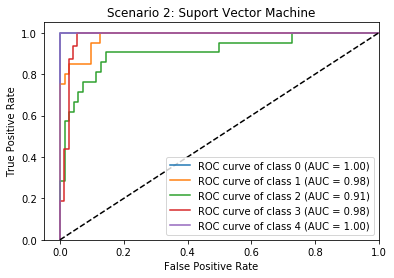

In [104]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# number of classes
n_classes = len(np.unique(y_test))

pred_prob_svm = best_model_svm.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_svm[:,i], pos_label=i)
    roc_auc[i] = auc( fpr[i], tpr[i])
    
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scenario 2: Suport Vector Machine')
plt.legend(loc="lower right")
plt.show()

In [105]:
# One-vs-One
macro_roc_auc_ovo = roc_auc_score(y_test, pred_prob_svm, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_prob_svm, multi_class="ovo", average="weighted")

# One-vs-Rest
macro_roc_auc_ovr = roc_auc_score(y_test, pred_prob_svm, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_prob_svm, multi_class="ovr", average="weighted")

print("One-vs-One AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("One-vs-Rest AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One AUROC scores:
0.9755 (macro),
0.9738 (weighted by prevalence)
One-vs-Rest AUROC scores:
0.9741 (macro),
0.9714 (weighted by prevalence)


## Random Forest

In [106]:
start_time = datetime.now()

rf = RandomForestClassifier()

param_grid_rf = {'max_depth': [2, 4, 5,6],
                'max_features':[1,2,3,4],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [4, 6, 8, 10],
                'criterion' :['gini', 'entropy'],
                'n_estimators': [10, 50, 100]}

grid_search_model_rf = GridSearchCV(rf, param_grid = param_grid_rf,cv = 5, n_jobs = -1, verbose = 2)
grid_search_model_rf.fit(X_train, y_train)

print(f'Best Score: {grid_search_model_rf.best_score_}')
print(f'Best Param: {grid_search_model_rf.best_params_}')

## fitting the best model

best_model_rf = grid_search_model_rf.best_estimator_
best_model_rf.fit(X_train, y_train)

end_time = datetime.now()

print(f'Train Score: {best_model_rf.score(X_train, y_train)}')
print(f'Test Score: {best_model_rf.score(X_test, y_test)}')
print('Random Forest: Duration: {}'.format(end_time - start_time))

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3946 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  3.9min finished


Best Score: 0.8542998477929984
Best Param: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}
Train Score: 0.9340659340659341
Test Score: 0.8241758241758241
Random Forest: Duration: 0:03:53.311655


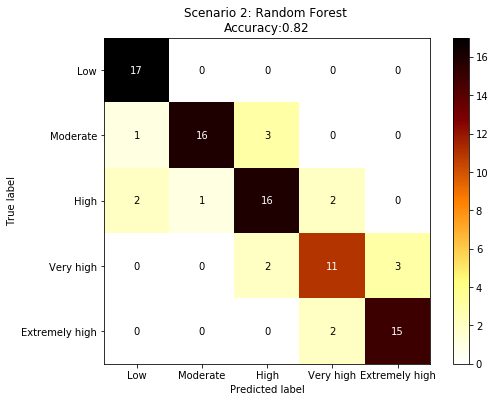

In [107]:
Class_labels = ['Low', 'Moderate', 'High', 'Very high','Extremely high']
plt.figure(figsize = (8,6))
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, best_model_rf.predict(X_test)), xlabel='Predicted label',
    ylabel='True label', xticklabels=Class_labels,
    yticklabels=Class_labels, cmap=plt.cm.afmhot_r, fmt="%d")
plt.title('Scenario 2: Random Forest \nAccuracy:{0:.2f}'.format(accuracy_score(y_test, best_model_rf.predict(X_test))))
plt.gca().invert_yaxis()
plt.colorbar(scores_image)

In [108]:
print (metrics.classification_report(y_test,  best_model_rf.predict(X_test),target_names=Class_labels ))

                precision    recall  f1-score   support

           Low       0.85      1.00      0.92        17
      Moderate       0.94      0.80      0.86        20
          High       0.76      0.76      0.76        21
     Very high       0.73      0.69      0.71        16
Extremely high       0.83      0.88      0.86        17

      accuracy                           0.82        91
     macro avg       0.82      0.83      0.82        91
  weighted avg       0.83      0.82      0.82        91



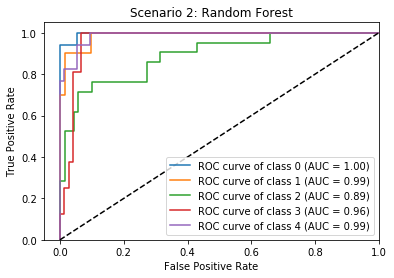

In [109]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# number of classes
n_classes = len(np.unique(y_test))

pred_prob_rf = best_model_rf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

for i in range(n_classes):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_rf[:,i], pos_label=i)
    roc_auc[i] = auc( fpr[i], tpr[i])
    
    
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scenario 2: Random Forest')
plt.legend(loc="lower right")
plt.show()

In [110]:
# One-vs-One
macro_roc_auc_ovo = roc_auc_score(y_test, pred_prob_rf, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, pred_prob_rf, multi_class="ovo", average="weighted")

# One-vs-Rest
macro_roc_auc_ovr = roc_auc_score(y_test, pred_prob_rf, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, pred_prob_rf, multi_class="ovr", average="weighted")

print("One-vs-One AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

print("One-vs-Rest AUROC scores:\n{:.4f} (macro),\n{:.4f} "
        "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One AUROC scores:
0.9661 (macro),
0.9648 (weighted by prevalence)
One-vs-Rest AUROC scores:
0.9652 (macro),
0.9627 (weighted by prevalence)


# Concluding remarks

As demonstrated above, all models were validated using previously unseen data. The validation results confirmed that, despite the fact that the dataset contained limited data covering a wider range of concrete types, all models except NB classified the level of chloride resistance of concrete with remarkably high accuracy. Among all algorithms, the SVM performed the best, with 89 percent and 88 percent accuracy in Scenarios 1 and 2, respectively. Despite this, the models in Scenario 1 performed significantly better than the models in Scenario 2. This corroborates that the inclusion in the dataset of all features describing the considered mix components is crucial for a more accurate and reliable classification of the chloride resistance of concrete. The models have both practical and economic implications. Engineers around the world can use the models to quickly evaluate the performance of concrete against chloride resistance without the need for time-consuming and costly laboratory testing. 